In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
f_real = lambda x: 1/(1+np.exp(-x))

In [3]:
f_approx_1 = np.vectorize( lambda x: (1/2) + (x * 1/4) )
f_approx_3 = np.vectorize( lambda x: (1/2) + (x * 1/4) - (x**3 * 1/48) )
f_approx_5 = np.vectorize( lambda x: (1/2) + (x * 1/4) - (x**3 * 1/48) + (x**5 * 1/480) )
f_approx_7 = np.vectorize( lambda x: (1/2) + (x * 1/4) - (x**3 * 1/48) + (x**5 * 1/480) - (x**7 * 17/80640) )
f_approx_9 = np.vectorize( lambda x: (1/2) + (x * 1/4) - (x**3 * 1/48) + (x**5 * 1/480) - (x**7 * 17/80640) + (x**9 * 31/1451520) )

In [4]:
def f_interpolated(interval, degree, precision, xs, print=False):
    coefs = np.polyfit(interval, f_real(interval), degree)
    coefs = [ int(x * 10**precision) / 10**precision for x in coefs ]
    if print: 
        for e, coef in enumerate(coefs): 
            if coef != 0.0: print("x**{}: %.{}f".format(degree-e, precision) % coef)
    interpolated = np.poly1d(coefs)
    return interpolated(xs)

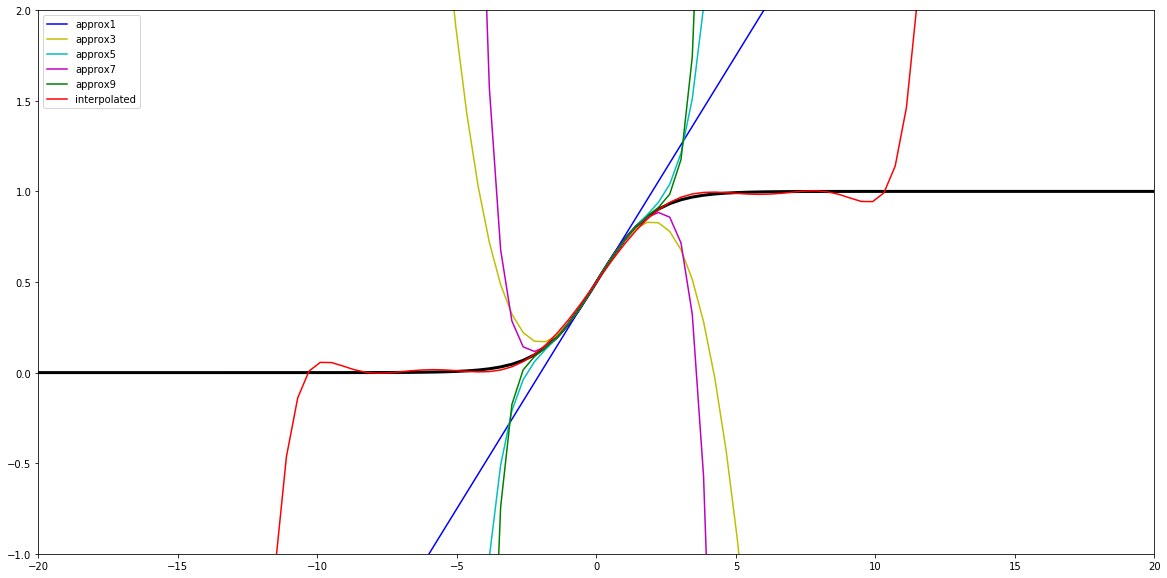

In [8]:
xs = np.linspace(-20, 20, 100)
plt.figure(figsize=(20,10))
plt.plot(xs, f_real(xs), color='k', linewidth=3.0)
plt.plot(xs, f_approx_1(xs), color='b', label='approx1')
plt.plot(xs, f_approx_3(xs), color='y', label='approx3')
plt.plot(xs, f_approx_5(xs), color='c', label='approx5')
plt.plot(xs, f_approx_7(xs), color='m', label='approx7')
plt.plot(xs, f_approx_9(xs), color='g', label='approx9')
plt.plot(xs, f_interpolated(np.linspace(-10, 10, 100), 10, 10, xs), color='r', label='interpolated')
plt.axis([-20, 20, -1, 2])
plt.legend(loc=2)
plt.show()

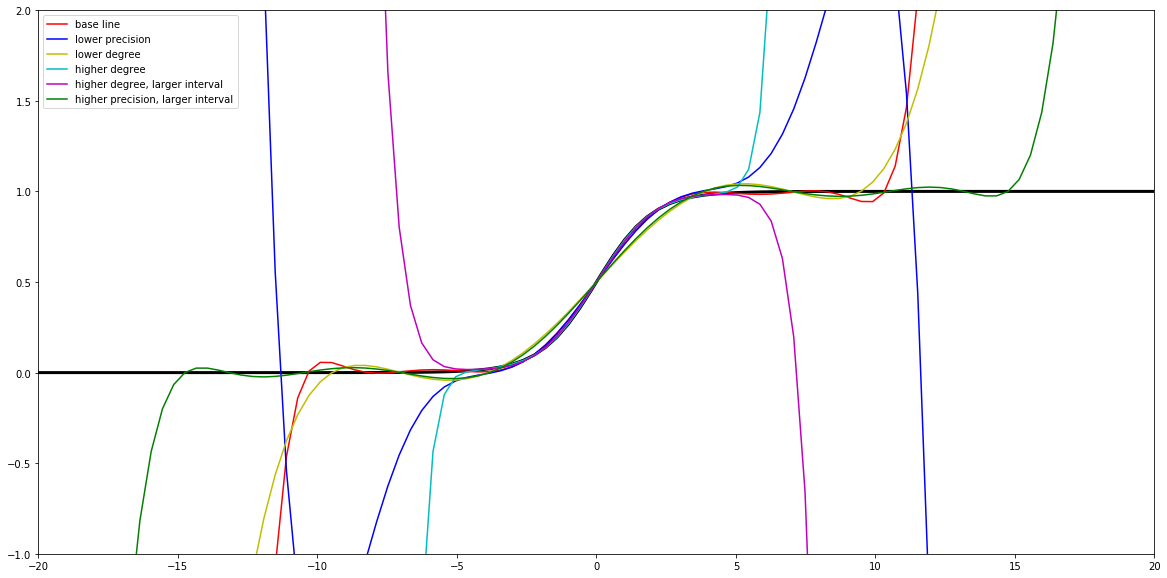

In [6]:
xs = np.linspace(-20, 20, 100)
plt.figure(figsize=(20,10))
plt.plot(xs, f_real(xs), color='k', linewidth=3.0)
plt.plot(xs, f_interpolated(np.linspace(-10, 10, 100), 10, 10, xs), color='r', label='base line')
plt.plot(xs, f_interpolated(np.linspace(-10, 10, 100), 10, 6, xs), color='b', label='lower precision')
plt.plot(xs, f_interpolated(np.linspace(-10, 10, 100), 5, 10, xs), color='y', label='lower degree')
plt.plot(xs, f_interpolated(np.linspace(-10, 10, 100), 20, 10, xs), color='c', label='higher degree')
plt.plot(xs, f_interpolated(np.linspace(-15, 15, 200), 20, 10, xs), color='m', label='higher degree, larger interval')
plt.plot(xs, f_interpolated(np.linspace(-15, 15, 100), 10, 20, xs), color='g', label='higher precision, larger interval')
plt.axis([-20, 20, -1, 2])
plt.legend(loc=2)
plt.show()